# <center>**Klasifikasi Pengenalan Audio**

Nama : Indah Kharisma

NIM : 210411100147

Kelas : PSD A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PSD/audio/emotional audio

Mounted at /content/drive
/content/drive/MyDrive/PSD/audio/emotional audio


In [ ]:
%%capture
pip install librosa

In [71]:
# Import Library

import os
import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, mode

#**Pemrosesan Data**

**Deskripsi Data**

Dataset ini untuk melatih klasifikasi emosi (7 emosi utama) dalam audio. Ada satu set 200 kata target yang diucapkan dalam frasa pembawa "Say the word _' oleh dua aktris (berusia 26 dan 64 tahun) dan rekaman dibuat dari set tersebut yang menggambarkan masing-masing tujuh emosi (marah, jijik, takut, bahagia, kejutan menyenangkan, kesedihan, dan netral). Total ada 2800 data (file audio).

Dataset tersebut disusun sedemikian rupa sehingga masing-masing dari dua aktor wanita dan emosi mereka terkandung dalam foldernya sendiri. Dan di dalamnya, semua file audio 200 kata target dapat ditemukan. Format file audio adalah format WAV

In [72]:
# Daftar folder yang akan dianalisis
folders = [
    'OAF_angry','OAF_disgust','OAF_Fear','OAF_happy','OAF_neutral','OAF_Pleasant_surprise','OAF_Sad','YAF_angry','YAF_disgust','YAF_fear','YAF_happy','YAF_neutral','YAF_pleasant_surprised','YAF_sad'
]

In [73]:
def calculate_statistics(audio_path):
    y, sr = librosa.load(audio_path)

    # UNTUK MENGHITUNG NILAI STATISTIKA
    mean = np.mean(y)
    std_dev = np.std(y)
    max_value = np.max(y)
    min_value = np.min(y)
    median = np.median(y)
    skewness = skew(y)
    kurt = kurtosis(y)
    q1 = np.percentile(y, 25)
    q3 = np.percentile(y, 75)
    mode_value, _ = mode(y)
    iqr = q3 - q1

    # UNTUK MENGHITUNG NILAI ZCR
    zcr_mean = np.mean(librosa.feature.zero_crossing_rate(y=y))
    zcr_median = np.median(librosa.feature.zero_crossing_rate(y=y))
    zcr_std_dev = np.std(librosa.feature.zero_crossing_rate(y=y))
    zcr_kurtosis = kurtosis(librosa.feature.zero_crossing_rate(y=y)[0])
    zcr_skew = skew(librosa.feature.zero_crossing_rate(y=y)[0])

    # UNTUK MENGHITUNG NILAI RMSE
    rmse = np.sum(y**2) / len(y)
    rmse_median = np.median(y**2)
    rmse_std_dev = np.std(y**2)
    rmse_kurtosis = kurtosis(y**2)
    rmse_skew = skew(y**2)

    return [zcr_mean, zcr_median, zcr_std_dev, zcr_kurtosis, zcr_skew, rmse, rmse_median, rmse_std_dev, rmse_kurtosis, rmse_skew]

In [74]:
# Membuat DataFrame untuk menyimpan hasil
data = []

In [75]:
# Loop melalui setiap folder dan file audio
for folder in folders:
    folder_path = f'{folder}'
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            audio_path = os.path.join(folder_path, filename)
            statistics = calculate_statistics(audio_path)
            data.append([folder, filename] + statistics)

In [76]:
# Membuat DataFrame dari data
columns =  ['Label', 'File'] + ['ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']
df = pd.DataFrame(data, columns=columns)

In [77]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('hasil_audio.csv', index=False)

In [78]:
# Menampilkan file CSV
df

,Label,File,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,OAF_angry,OAF_bar_angry.wav,0.093492,0.073486,0.092156,5.375023,2.351386,0.000816,0.000065,0.002035,38.330481,5.086085
1,OAF_angry,OAF_bath_angry.wav,0.107017,0.055176,0.122474,3.534486,2.090227,0.003370,0.000184,0.008584,28.569717,4.586325
2,OAF_angry,OAF_back_angry.wav,0.085165,0.057129,0.096892,6.195356,2.569610,0.003138,0.000161,0.008551,37.627046,5.372503
3,OAF_angry,OAF_base_angry.wav,0.135888,0.071289,0.133905,1.334860,1.560679,0.001682,0.000076,0.004909,38.826234,5.510271
4,OAF_angry,OAF_cab_angry.wav,0.092378,0.065430,0.088781,5.642932,2.346017,0.000746,0.000068,0.001859,32.876072,4.855687
...,...,...,...,...,...,...,...,...,...,...,...,...
2817,YAF_sad,YAF_young_sad.wav,0.118967,0.038574,0.194587,4.191204,2.367201,0.001229,0.000189,0.002673,25.149270,4.197964
2818,YAF_sad,YAF_witch_sad.wav,0.168584,0.039307,0.227741,1.044324,1.531838,0.001462,0.000142,0.003381,26.135000,4.261510
2819,YAF_sad,YAF_which_sad.wav,0.157758,0.038086,0.222642,1.170585,1.582929,0.003143,0.000411,0.006965,22.366196,4.141749
2820,YAF_sad,YAF_yes_sad.wav,0.172475,0.035889,0.248237,0.546175,1.487487,0.002709,0.000381,0.005774,16.285086,3.668968


##**Penjelasan Fitur**

* 'OAF_angry': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi marah dari pembicara OAF.
*'OAF_disgust': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi jijik atau muak dari pembicara OAF.
*'OAF_Fear': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi takut dari pembicara OAF.
*'OAF_happy': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi bahagia dari pembicara OAF.
*'OAF_neutral': mencerminkan ekspresi wajah atau suara yang terkait dengan ekspresi wajah atau suara netral dari pembicara OAF.
*'OAF_Pleasant_surprise': mencerminkan ekspresi wajah atau suara yang terkait dengan kejutan menyenangkan dari pembicara OAF.
*'OAF_Sad': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi sedih dari pembicara OAF.
Untuk Pembicara YAF:
*'YAF_angry': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi marah dari pembicara YAF.
*'YAF_disgust': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi jijik atau muak dari pembicara YAF.
*'YAF_fear': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi takut dari pembicara YAF.
*'YAF_happy': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi bahagia dari pembicara YAF.
*'YAF_neutral': mencerminkan ekspresi wajah atau suara yang terkait dengan ekspresi wajah atau suara netral dari pembicara YAF.
*'YAF_Pleasant_surprise': mencerminkan ekspresi wajah atau suara yang terkait dengan kejutan menyenangkan dari pembicara YAF.
*'YAF_sad': mencerminkan ekspresi wajah atau suara yang terkait dengan emosi sedih dari pembicara YAF.




# **PREPROCESSING**

##**NORMALISASI MENGGUNAKAN Z-SCORE**

**Z-score** (Z-skor) adalah metode normalisasi yang mengubah data ke dalam distribusi normal standar dengan rata-rata (mean) 0 dan deviasi standar (standard deviation) 1.

**StandardScaler** adalah alat yang digunakan untuk menerapkan metode Z-score ini ke data Anda. Dengan kata lain, StandardScaler adalah implementasi konkret dari normalisasi Z-score dalam scikit-learn.

Rumus:
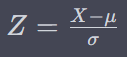


Penjelasan:

*   Z adalah Z-score
*   X adalah nilai individu
*   μ adalah rata-rata dari data set
*   σ adalah deviasi standar dari data set

## **NORMALISASI SETELAH SPLIT DATA (normalisasi bisa dilakukan sebelum atau sesudah split data)**


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from pickle import dump

In [103]:
# Baca data dari file CSV
dataknn= pd.read_csv('hasil_audio.csv')
# Pisahkan fitur (X) dan label (y)
X = dataknn.drop(['Label','File'], axis=1)  # Ganti 'target_column' dengan nama kolom target
y = dataknn['Label']
# split data into train and test sets
X_train,X_test,y_train, y_test= train_test_split(X, y, random_state=1, test_size=0.2)
# define scaler
scaler = StandardScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))
# transform the training dataset
# normalisasi data train
X_train_scaled = scaler.transform(X_train)
dataknn

,Label,File,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,OAF_angry,OAF_bar_angry.wav,0.093492,0.073486,0.092156,5.375023,2.351386,0.000816,0.000065,0.002035,38.330481,5.086085
1,OAF_angry,OAF_bath_angry.wav,0.107017,0.055176,0.122474,3.534486,2.090227,0.003370,0.000184,0.008584,28.569717,4.586325
2,OAF_angry,OAF_back_angry.wav,0.085165,0.057129,0.096892,6.195356,2.569610,0.003138,0.000161,0.008551,37.627046,5.372503
3,OAF_angry,OAF_base_angry.wav,0.135888,0.071289,0.133905,1.334860,1.560679,0.001682,0.000076,0.004909,38.826234,5.510271
4,OAF_angry,OAF_cab_angry.wav,0.092378,0.065430,0.088781,5.642932,2.346017,0.000746,0.000068,0.001859,32.876072,4.855687
...,...,...,...,...,...,...,...,...,...,...,...,...
2817,YAF_sad,YAF_young_sad.wav,0.118967,0.038574,0.194587,4.191204,2.367201,0.001229,0.000189,0.002673,25.149270,4.197964
2818,YAF_sad,YAF_witch_sad.wav,0.168584,0.039307,0.227741,1.044324,1.531838,0.001462,0.000142,0.003381,26.135000,4.261510
2819,YAF_sad,YAF_which_sad.wav,0.157758,0.038086,0.222642,1.170585,1.582929,0.003143,0.000411,0.006965,22.366196,4.141749
2820,YAF_sad,YAF_yes_sad.wav,0.172475,0.035889,0.248237,0.546175,1.487487,0.002709,0.000381,0.005774,16.285086,3.668968


In [104]:
X_test.shape

(565, 10)

In [105]:
X_train.shape

(2257, 10)

In [106]:
import pickle
with open('scaler.pkl', 'rb') as standarisasi:
    loadscal= pickle.load(standarisasi)

In [107]:
#normalisasi X testing dari hasil normalisasi X train yang disimpan dalam model
X_test_scaled=loadscal.transform(X_test)

# **Metode KNN**

**K-Nearest Neighbors (KNN)** adalah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini merupakan salah satu metode pembelajaran mesin yang termasuk dalam kategori pembelajaran berbasis instan (instance-based learning) atau pembelajaran berbasis data.

Klasifikasi dengan KNN:
Dalam konteks klasifikasi, KNN bekerja dengan cara sebagai berikut:

* Penentuan Tetangga Terdekat: Mengukur jarak antara data baru (poin uji) dengan semua titik data latih.
* Pemilihan K Tetangga Terdekat: Memilih K tetangga terdekat dari data baru berdasarkan jarak.
* Voting atau Weighted Voting: Menentukan label atau nilai target untuk data baru dengan melihat mayoritas kelas dari K tetangga terdekat. Dalam beberapa implementasi, bobot dapat diterapkan pada voting berdasarkan jarak.

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [109]:
K = 50
acc = np.zeros((K-1))

for n in range(1,K,2):
    knn = KNeighborsClassifier(n_neighbors= n, metric = "euclidean").fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc[n-1]= accuracy_score(y_test,y_pred)

print('akurasi terbaik adalah ', acc.max(), 'dengan nilai k =', acc.argmax()+1)

akurasi terbaik adalah  0.679646017699115 dengan nilai k = 7


In [110]:
knn = KNeighborsClassifier(n_neighbors= 13, metric = "euclidean")
dump(knn, open('modelknn.pkl', 'wb'))


In [111]:
import pickle
with open('modelknn.pkl', 'rb') as knn:
    loadknn= pickle.load(knn)
loadknn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [112]:
y_pred = loadknn.predict(X_test_scaled)
y_pred

array(['YAF_fear', 'YAF_pleasant_surprised', 'OAF_happy', 'YAF_neutral',
       'YAF_happy', 'YAF_sad', 'YAF_neutral', 'YAF_neutral', 'YAF_happy',
       'OAF_disgust', 'OAF_angry', 'OAF_angry', 'OAF_neutral',
       'YAF_pleasant_surprised', 'YAF_pleasant_surprised', 'YAF_angry',
       'YAF_sad', 'YAF_disgust', 'OAF_Sad', 'YAF_sad', 'OAF_Sad',
       'YAF_angry', 'OAF_disgust', 'YAF_pleasant_surprised',
       'OAF_disgust', 'YAF_happy', 'OAF_happy', 'YAF_angry',
       'OAF_neutral', 'OAF_angry', 'OAF_Pleasant_surprise',
       'OAF_Pleasant_surprise', 'OAF_disgust', 'OAF_neutral',
       'YAF_neutral', 'YAF_happy', 'YAF_neutral', 'OAF_Pleasant_surprise',
       'YAF_neutral', 'YAF_fear', 'OAF_happy', 'YAF_sad', 'YAF_neutral',
       'YAF_happy', 'YAF_disgust', 'OAF_angry', 'OAF_disgust',
       'YAF_neutral', 'YAF_fear', 'YAF_fear', 'YAF_disgust', 'YAF_angry',
       'YAF_happy', 'YAF_angry', 'YAF_fear', 'OAF_Pleasant_surprise',
       'YAF_disgust', 'OAF_Pleasant_surprise', 'YAF_f

In [113]:
accuracy = accuracy_score(y_test,y_pred)
print("Akurasi:",accuracy)

Akurasi: 0.6707964601769911


#**REDUKSI DATA**

Reduksi ada 2 jenis bisa menggunakan seleksi data atau transformation data (contoh nya PCA / Principal component anlysis).
seleksi data kita dapat emmilih fitur berdasarkan yang fitur/ kolom yang paling berpengaruh.
sedangkan transformasi data kita perlu membuat kooordinat baru dari dari fitur yang ada sejumlah dengan jumlah fitur nya.
mengapa reduksi data atau data reduction di perlukan?
karna terlalu banyak kolom/fitur/ciri yang harus dikenali tidak baik untuk pemprosesan data dan memakan waktu komputasi yang lama, maka dari itu reduksi data di lakukan untuk mendapatkan data yang terbaik.
ketika ingin mencari koordinat baru:
1. buat matriks covarian
2. buat persamaan

note : konstanta yang paling besar mengartikan di koordinat tersebut merupakan ciri paling banyak atau penting

In [114]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=8)
X_train_pca= sklearn_pca.fit_transform(X_train_scaled)
type(X_train_pca)

numpy.ndarray

In [115]:
dump(sklearn_pca, open('PCA8.pkl', 'wb'))

In [116]:
import pickle
with open('PCA8.pkl', 'rb') as pca:
    loadpca= pickle.load(pca)

In [117]:
X_test_pca=loadpca.transform(X_test_scaled)
X_test_pca.shape

(565, 8)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=15)

In [119]:
y_prediksi = classifier.predict(X_test_pca)
y_prediksi

array(['YAF_fear', 'YAF_pleasant_surprised', 'OAF_happy', 'YAF_neutral',
       'YAF_happy', 'YAF_sad', 'YAF_neutral', 'YAF_neutral', 'YAF_happy',
       'OAF_disgust', 'OAF_angry', 'OAF_angry', 'OAF_neutral',
       'YAF_pleasant_surprised', 'YAF_pleasant_surprised',
       'YAF_pleasant_surprised', 'YAF_sad', 'YAF_disgust', 'OAF_Sad',
       'YAF_sad', 'OAF_Sad', 'YAF_angry', 'OAF_disgust',
       'YAF_pleasant_surprised', 'OAF_disgust', 'YAF_happy', 'OAF_happy',
       'YAF_angry', 'OAF_neutral', 'OAF_angry', 'OAF_Pleasant_surprise',
       'OAF_Pleasant_surprise', 'OAF_disgust', 'OAF_neutral',
       'YAF_neutral', 'YAF_happy', 'YAF_neutral', 'OAF_Pleasant_surprise',
       'YAF_neutral', 'YAF_fear', 'OAF_happy', 'YAF_sad', 'YAF_neutral',
       'YAF_happy', 'YAF_disgust', 'OAF_angry', 'OAF_disgust',
       'YAF_neutral', 'YAF_angry', 'YAF_fear', 'YAF_disgust', 'YAF_angry',
       'YAF_happy', 'YAF_angry', 'YAF_fear', 'OAF_happy', 'YAF_disgust',
       'OAF_Pleasant_surprise', 'YAF

In [120]:
acc_pca= accuracy_score(y_test,y_prediksi)
print("Akurasi:",acc_pca)

Akurasi: 0.6654867256637168


#LINK STREAMLIT

link streamlit klasifikasi audio ada di bawah ini :

https://uts-klasifikasi-suara.streamlit.app/